## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  林子涵
+ 学号  0165168

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [5]:
sentinels = {'a13': [' '], 'a14': [' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df1=df.sample(n=1000,axis=0)
df1.head()

,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
12656,12657,295,76,19,1,1,3903.884033,1,1,10,...,2,2,1,1,3,3,3,2,1,2
3059,3060,78,20,5,3,3,169.141174,0,0,15,...,2,1,,,8,7,8,1,1,2
13551,13552,315,81,21,1,1,4033.718506,1,1,12,...,1,1,,,3,3,3,2,2,2
4052,4053,103,26,7,2,2,366.148621,1,1,9,...,2,1,,,7,6,7,1,2,1
10519,10520,256,67,17,1,1,2164.127930,1,0,10,...,2,2,1,3,3,3,3,1,1,2


In [7]:
df2=df1[['a13','a14']]
df2.head()

,a13,a14
12656,175.0,130.0
3059,167.0,128.0
13551,163.0,84.0
4052,171.0,124.0
10519,164.0,94.0


In [8]:
df2.mean(skipna=True)

a13    161.598563
a14     99.630719
dtype: float64

In [9]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df = pd.DataFrame(df)

y=[]
for i in range(30):
    df=df.sample(n=1000,axis=0)
    df=pd.DataFrame(df)
    x1=df.a13
    for x2 in x1:
        x2=x2.strip()
        if x2=="":
            continue
        x=[]
        x.append(float(x2))
    x=pd.DataFrame(x)
    y.append(x.mean())
y1=[]
for y2 in y:
    y1.append(float(y2))
y1

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[167.0,
 160.0,
 157.0,
 158.0,
 150.0,
 164.0,
 176.0,
 152.0,
 155.0,
 170.0,
 165.0,
 166.0,
 160.0,
 158.0,
 160.0,
 144.0,
 168.0,
 156.0,
 156.0,
 156.0,
 173.0,
 160.0,
 155.0,
 145.0,
 163.0,
 160.0,
 165.0,
 165.0,
 153.0,
 173.0]

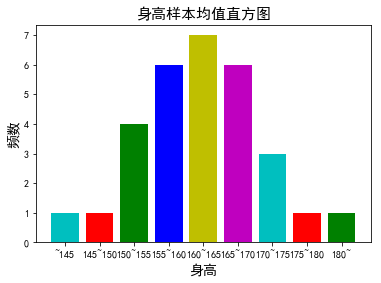

In [10]:
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
count8=0
count9=0
for y5 in y1:
    if y5<145:
        count1+=1
    elif 145<=y5<150:
        count2+=1
    elif 150<y5<=155:
        count3+=1
    elif 155<=y5<160:
        count4+=1
    elif 160<=y5<165:
        count5+=1
    elif 165<=y5<170:
        count6+=1
    elif 170<=y5<175:
        count7+=1
    elif 175<=y5<180:
        count8+=1
    else:
        count9+=1
num_list=[count1,count2,count3,count4,count5,count6,count7,count8,count9]
height_list=["~145","145~150","150~155","155~160","160~165","165~170","170~175","175~180","180~"]
plt.bar(range(len(num_list)), num_list,tick_label = height_list,color='crgbym')  
plt.title('身高样本均值直方图', fontsize=15)
plt.xlabel('身高', fontsize=14)
plt.ylabel('频数', fontsize=14)

plt.show()

In [11]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df = pd.DataFrame(df)

y=[]
for i in range(30):
    df=df.sample(n=1000,axis=0)
    df=pd.DataFrame(df)
    x1=df.a14
    for x2 in x1:
        x2=x2.strip()
        if x2=="":
            continue
        x=[]
        x2=float(x2)
        x.append(x2)
    x=pd.DataFrame(x)
    y.append(x.mean())
y3=[]
for y2 in y:
    y3.append(float(y2))
y3

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[54.0,
 64.0,
 75.0,
 100.0,
 85.0,
 130.0,
 117.0,
 78.0,
 90.0,
 70.0,
 105.0,
 76.0,
 130.0,
 120.0,
 79.0,
 80.0,
 110.0,
 168.0,
 73.0,
 110.0,
 98.0,
 130.0,
 60.0,
 80.0,
 101.0,
 92.0,
 67.0,
 100.0,
 92.0,
 80.0]

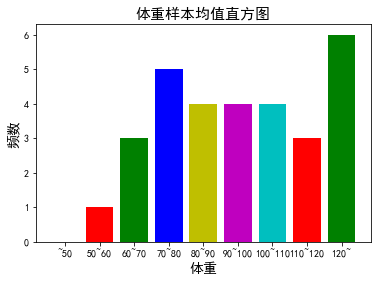

In [12]:
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
count8=0
count9=0
for y5 in y3:
    if y5<50:
        count1+=1
    elif 50<=y5<60:
        count2+=1
    elif 60<y5<=70:
        count3+=1
    elif 70<=y5<80:
        count4+=1
    elif 80<=y5<90:
        count5+=1
    elif 90<=y5<100:
        count6+=1
    elif 100<=y5<110:
        count7+=1
    elif 110<=y5<120:
        count8+=1
    else:
        count9+=1
num_list=[count1,count2,count3,count4,count5,count6,count7,count8,count9]
height_list=["~50","50~60","60~70","70~80","80~90","90~100","100~110","110~120","120~"]
plt.bar(range(len(num_list)), num_list,tick_label = height_list,color='crgbym')  
plt.title('体重样本均值直方图', fontsize=15)
plt.xlabel('体重', fontsize=14)
plt.ylabel('频数', fontsize=14)

plt.show()

In [13]:
sum1=0
weight_ave=0
for y4 in y1:
    sum1+=y4
weight_ave=sum1/30
print("身高均值的均值为",weight_ave)


身高均值的均值为 160.33333333333334


In [14]:
sum2=0
height_ave=0
for y4 in y3:
    sum2+=y4
height_ave=sum2/30
print("体重均值的均值为",height_ave)

体重均值的均值为 93.8


In [15]:
sum3=0
std_height=0
for y4 in y1:
    sum3+=(y4-height_ave)**2
std_height=sum3/30
print("身高均值的标准误为",(std_height)**0.5)

身高均值的标准误为 66.96994350701912


In [16]:
sum4=0
std_weight=0
for y4 in y3:
    sum4+=(y4-weight_ave)**2
std_weight=sum4/30
print("体重均值的标准误为",(std_weight)**0.5)

体重均值的标准误为 71.03973848800717


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [51]:
sentinels = {'tr_eng': [' '], 'c07': [' '],"b14b1":[" "],"c08":[" "],"tr_chn":[" "]}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df = pd.DataFrame(df)
df1=df[['tr_eng', "c07","b14b1","c08","tr_chn"]]
df1.columns = ['eng_score','learn_in_primary','study_time',"rank","chn_score"]
df1

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eng_score,learn_in_primary,study_time,rank,chn_score
0,86.0,1.0,1.0,3.0,84.0
1,86.0,1.0,4.0,9.0,82.0
2,89.0,1.0,1.0,10.0,81.0
3,67.0,1.0,3.0,5.0,80.0
4,89.0,1.0,1.0,7.0,84.0
5,68.0,1.0,4.0,15.0,83.0
6,NaN,1.0,3.0,5.0,NaN
7,97.0,1.0,4.0,3.0,89.0
8,83.0,1.0,2.0,15.0,83.0
9,87.0,1.0,2.0,11.0,75.0


In [58]:
dummies = pd.get_dummies(df1.learn_in_primary, prefix='learn_in_primary')
df1_with_dummies = df1.drop('learn_in_primary', axis=1).join(dummies)
df1_with_dummies

,eng_score,study_time,rank,chn_score,learn_in_primary_1.0,learn_in_primary_2.0
0,86.0,1.0,3.0,84.0,1,0
1,86.0,4.0,9.0,82.0,1,0
2,89.0,1.0,10.0,81.0,1,0
3,67.0,3.0,5.0,80.0,1,0
4,89.0,1.0,7.0,84.0,1,0
5,68.0,4.0,15.0,83.0,1,0
6,NaN,3.0,5.0,NaN,1,0
7,97.0,4.0,3.0,89.0,1,0
8,83.0,2.0,15.0,83.0,1,0
9,87.0,2.0,11.0,75.0,1,0


In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [60]:
import patsy
y, X = patsy.dmatrices('eng_score ~ learn_in_primary + study_time+rank+chn_score', df1)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              eng_score   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     4639.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:32:28   Log-Likelihood:                -77087.
No. Observations:               17298   AIC:                         1.542e+05
Df Residuals:                   17293   BIC:                         1.542e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            8.8104      1.165  

从CEPS.csv中选取tr_eng，c07，b14b1，c08，tr_chn五个变量构建回归方程，其含义分别为学生的英语成绩，小学的时候是否上过英语课，过去一周里每天花多少时间写学校老师布置的作业， 小学六年级时你的成绩是班里排名，该学生语文成绩。这里我们将c07,b14b1,c08,tr_chn这四个变量作为自变量，tr_eng作为因变量。从回归结果可以看出，该回归模型的解释力度，即模型的拟合程度R-square为51.8%。该模型的显著性检验结果sig<0.05,因此该模型是显著有效的。另外由上面给出的表可以看到各个变量的系数和各系数的显著性检验结果，我们可以看出进入模型的这四个变量都是显著不为0的。其中，在保持其他变量不变的情况下，小学里没上过英语的学生比上过英语的学生在英语成绩上少了5.2013分。同理，在其他变量保持不变的情况下，学习时间没增加一个小时，英语成绩就上升0.2284分，小学六年级在班里排名每增加一名，英语成绩就下降0.3832分，语文成绩每增加一分，英语成绩就上升0.9824分。